# Análisis de Datos - Turismo Internacional en España 2019-2024

![](https://mediterrani.com/wp-content/webp-express/webp-images/uploads/2018/05/sector-turi%CC%81stico-en-espan%CC%83a.jpg.webp)

## Preparación y Carga de Datos

### Librerías

In [127]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Otros
import json

## Carga de Datos

In [128]:
dftotal = pd.read_csv("total.csv")

## Análisis Exploratorio de Datos (EDA)

### Análisis Univariante

In [129]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FECHA              3328 non-null   object 
 1   PROVINCIA_DESTINO  3328 non-null   object 
 2   TURISTAS           3328 non-null   int64  
 3   PERNOCTACIONES     3328 non-null   int64  
 4   ESTANCIA_MEDIA     3328 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 130.1+ KB


In [130]:
dftotal.describe(include='object')

,FECHA,PROVINCIA_DESTINO
count,3328,3328
unique,64,52
top,2019/07,A Coruña
freq,52,64


In [131]:
dftotal[["TURISTAS", "PERNOCTACIONES", "ESTANCIA_MEDIA"]].describe()

,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
count,3.328000e+03,3.328000e+03,3328.000000
mean,1.105854e+05,8.121999e+05,8.331430
std,2.327480e+05,1.561353e+06,2.275669
min,1.679000e+03,2.008100e+04,3.000000
25%,1.481200e+04,1.259595e+05,7.000000
50%,3.225650e+04,2.591370e+05,8.000000
75%,7.976625e+04,6.267038e+05,9.000000
max,2.428342e+06,1.578477e+07,18.000000


In [132]:
dftotal.min()

FECHA                 2019/07
PROVINCIA_DESTINO    A Coruña
TURISTAS                 1679
PERNOCTACIONES          20081
ESTANCIA_MEDIA            3.0
dtype: object

In [133]:
dftotal.max()

FECHA                 2024/10
PROVINCIA_DESTINO       Ávila
TURISTAS              2428342
PERNOCTACIONES       15784772
ESTANCIA_MEDIA           18.0
dtype: object

Histograma

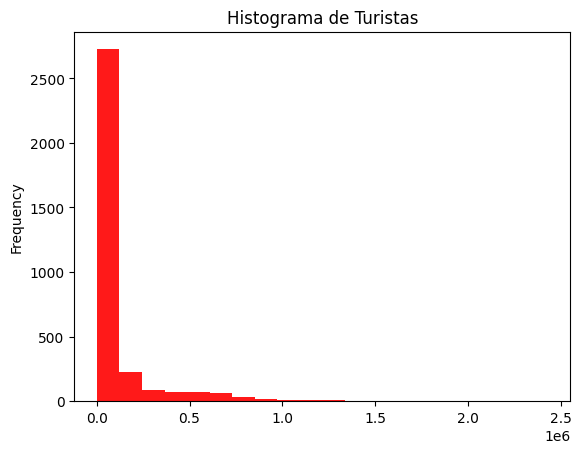

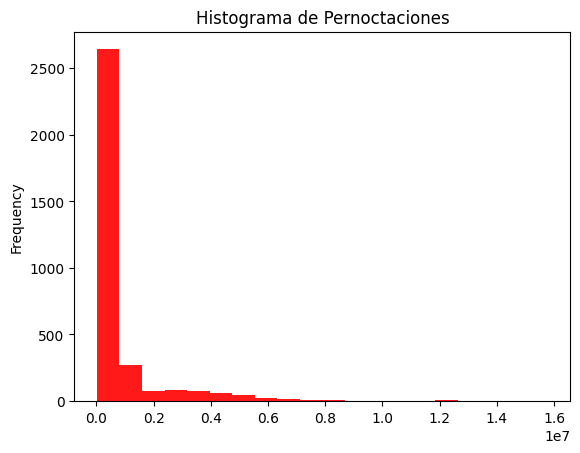

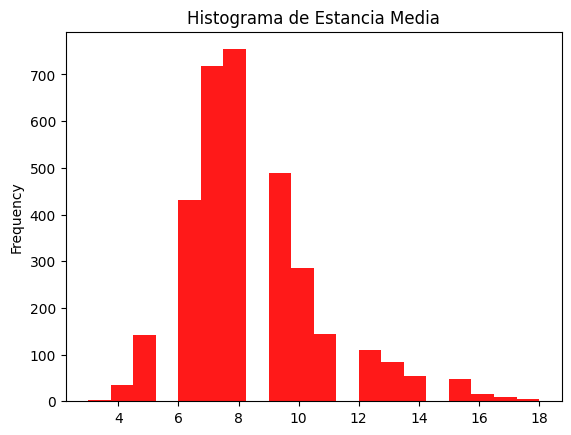

In [143]:
dftotal['TURISTAS'].plot(kind='hist', bins=20, alpha=0.9, title='Histograma de Turistas', cmap="autumn")
plt.savefig('hist_turista.png')
plt.show()

dftotal['PERNOCTACIONES'].plot(kind='hist', bins=20, alpha=0.9, title='Histograma de Pernoctaciones', cmap="autumn")
plt.savefig('hist_pernoctaciones.png')
plt.show()

dftotal['ESTANCIA_MEDIA'].plot(kind='hist', bins=20, alpha=0.9, title='Histograma de Estancia Media', cmap="autumn")
plt.savefig('hist_estancia_media.png')
plt.show()

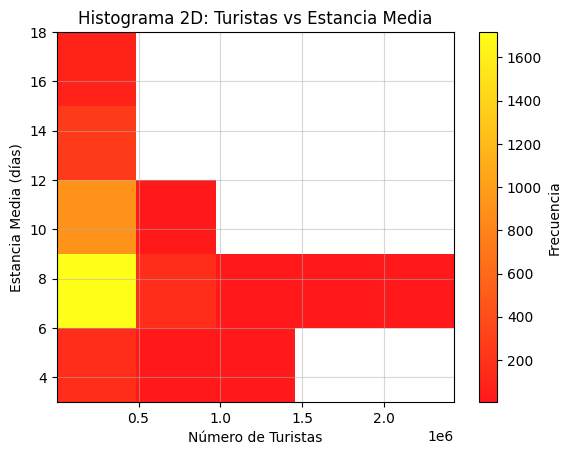

In [135]:
plt.hist2d(dftotal["TURISTAS"], dftotal["ESTANCIA_MEDIA"], bins=(5, 5), cmap="autumn", cmin=5, alpha=0.9)
plt.colorbar(label="Frecuencia")
plt.title("Histograma 2D: Turistas vs Estancia Media")
plt.xlabel("Número de Turistas")
plt.ylabel("Estancia Media (días)")
plt.grid(alpha=0.5)
plt.savefig('hist2D.png')
plt.show()

Scatter Plots

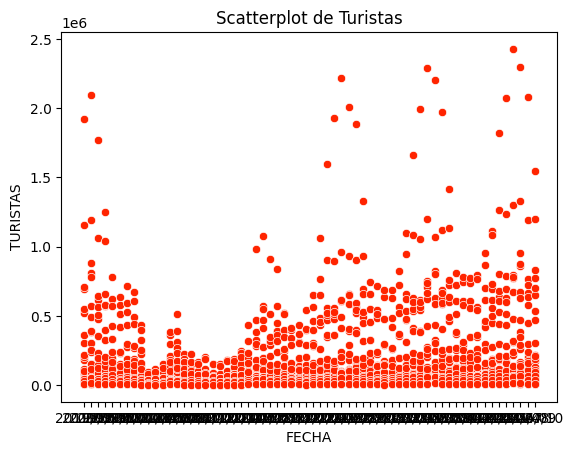

In [136]:
sns.set_palette("autumn")
scatter=sns.scatterplot(data=dftotal, x='FECHA', y='TURISTAS')
scatter.set_title ("Scatterplot de Turistas")
plt.savefig('scatter_turista.png')
plt.show()

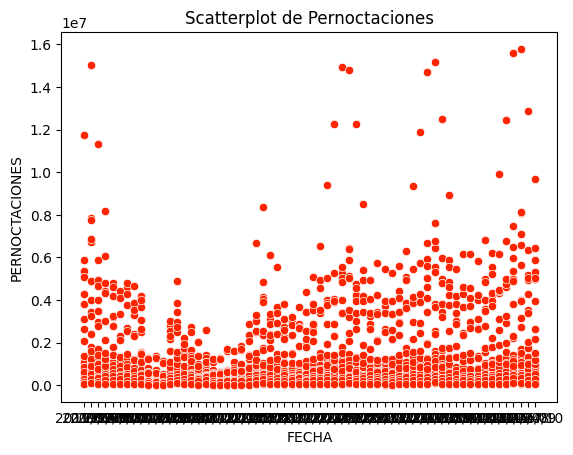

In [137]:
sns.set_palette("autumn")
scatter=sns.scatterplot(data=dftotal, x='FECHA', y='PERNOCTACIONES')
scatter.set_title ("Scatterplot de Pernoctaciones")
plt.savefig('scatter_pernoctaciones.png')
plt.show()

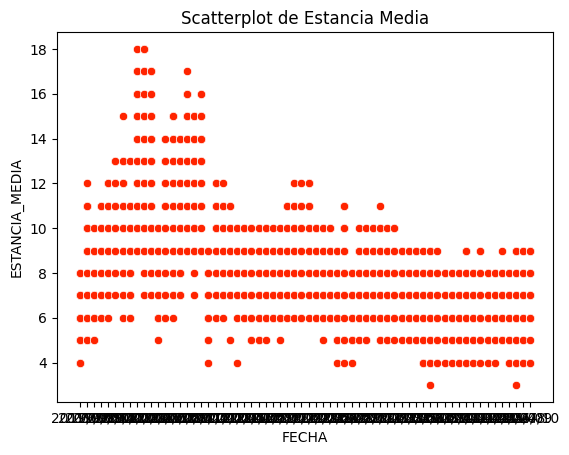

In [138]:
sns.set_palette("autumn")
scatter=sns.scatterplot(data=dftotal, x='FECHA', y='ESTANCIA_MEDIA')
scatter.set_title ("Scatterplot de Estancia Media")
plt.savefig('scatter_estancia_media.png')
plt.show()

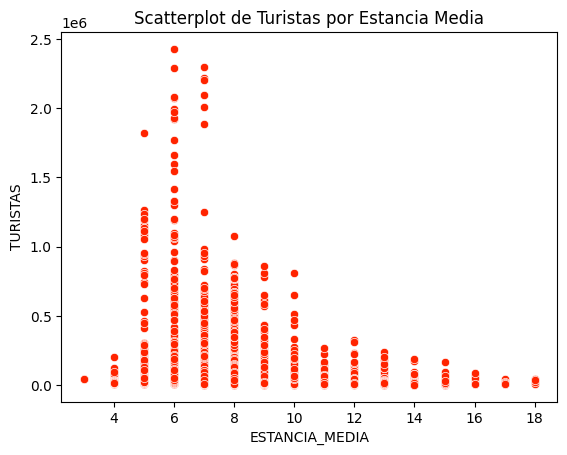

In [144]:
sns.set_palette("autumn")
scatter=sns.scatterplot(data=dftotal, x='ESTANCIA_MEDIA', y='TURISTAS')
scatter.set_title ("Scatterplot de Turistas por Estancia Media")
plt.savefig('scatter_estancia_media_turistas.png')
plt.show()

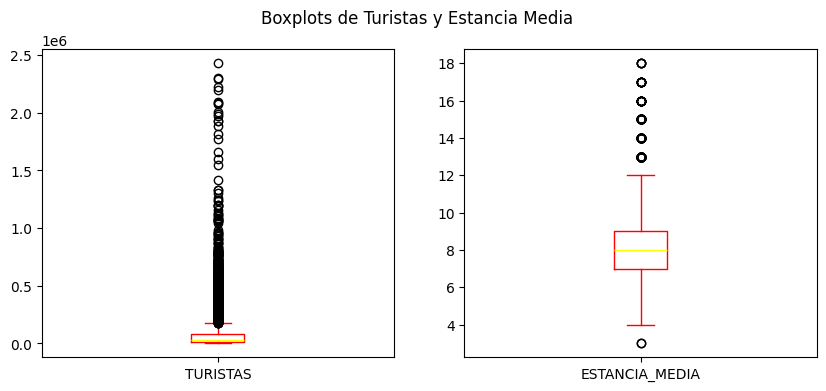

In [123]:
dftotal[['TURISTAS', 'ESTANCIA_MEDIA']].plot(kind='box', subplots=True, layout=(1,2), figsize=(10,4), title='Boxplots de Turistas y Estancia Media', cmap="autumn")
plt.savefig('plot_estancia_media_turistas.png')
plt.show()

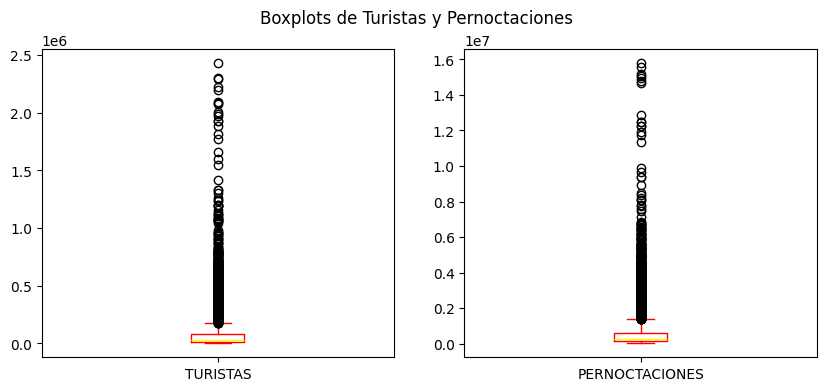

In [124]:
dftotal[['TURISTAS', 'PERNOCTACIONES']].plot(kind='box', subplots=True, layout=(1,2), figsize=(10,4), title='Boxplots de Turistas y Pernoctaciones', cmap="autumn")
plt.savefig('plot_pernoctaciones_turistas.png')
plt.show()

### Análisis Multivariante

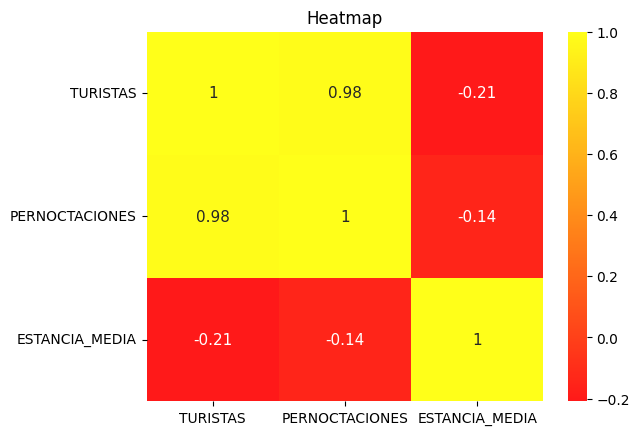

In [140]:
dftotal = dftotal.select_dtypes(exclude=['object'])
scatter=sns.heatmap(dftotal.corr(), annot=True, annot_kws={"size": 11}, cmap="autumn", alpha=0.9)
scatter.set_title ("Heatmap")
plt.savefig('heatmap.png')